In [71]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
from pylab import mpl, plt
import pytz

In [72]:
plt.rcParams['figure.figsize'] = (20,4)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [73]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [74]:
ativo = 'WDOJ22'

In [75]:
def get_ohlc(ativo, timeframe, n=5):
    ativo = mt5.copy_rates_from_pos(ativo, timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time'] = pd.to_datetime(ativo['time'], unit='s')
    ativo.set_index('time', inplace=True)
    return ativo

In [97]:
df = get_ohlc(ativo, mt5.TIMEFRAME_M15, 500)

In [98]:
df['Var'] = df['close'].pct_change()

In [99]:
#df = df[df['real_volume'] > 14000]

In [100]:
df

,open,high,low,close,tick_volume,spread,real_volume,Var
time,,,,,,,,
2022-02-11 16:30:00,5295.0,5295.0,5295.0,5295.0,1,500,1,NaN
2022-02-11 16:45:00,5300.0,5303.0,5300.0,5303.0,16,500,106,0.001511
2022-02-11 17:00:00,5305.0,5310.0,5297.0,5310.0,10,500,104,0.001320
2022-02-11 17:15:00,5310.0,5318.5,5310.0,5315.0,4,500,6,0.000942
2022-02-11 17:30:00,5314.5,5327.5,5314.5,5327.5,11,500,95,0.002352
...,...,...,...,...,...,...,...,...
2022-03-08 17:15:00,5089.5,5095.5,5089.0,5095.0,3046,500,46153,0.001179
2022-03-08 17:30:00,5095.0,5097.0,5092.0,5096.0,3121,500,37744,0.000196
2022-03-08 17:45:00,5096.0,5101.5,5093.0,5099.0,3183,500,33687,0.000589


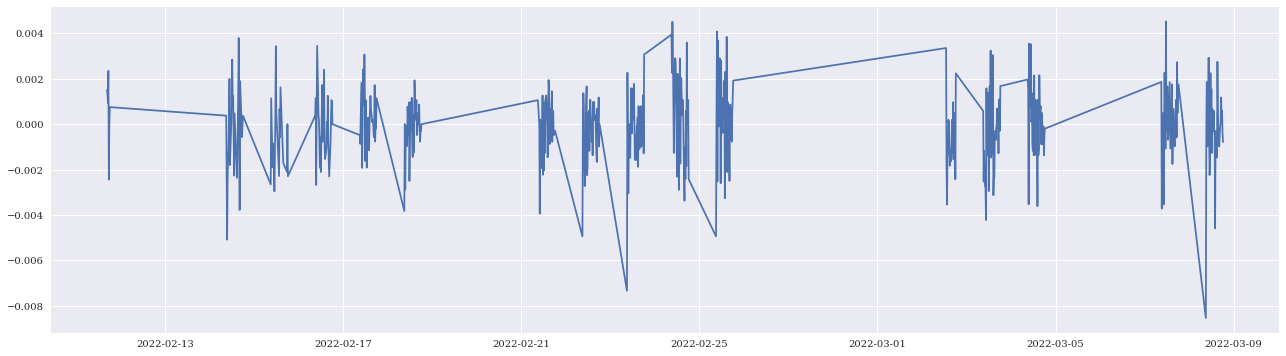

In [101]:
plt.figure(figsize=(22,6))
plt.plot('Var', data=df);